<a href="https://colab.research.google.com/github/Salsabilngh/ids/blob/main/EDA_UNSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('deep')


In [ ]:
# Chargement des fichiers d'entraînement et de test
train_path = '/content/UNSW_NB15_training-set (1).csv'
test_path = '/content/UNSW_NB15_testing-set (1).csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print("Taille du jeu d'entraînement :", df_train.shape)
print("Taille du jeu de test :", df_test.shape)


Taille du jeu d'entraînement : (82332, 45)
Taille du jeu de test : (175341, 45)


In [ ]:
# Fusion pour l'analyse globale
df = pd.concat([df_train, df_test], ignore_index=True)

print("Taille totale du dataset combiné :", df.shape)
df.head()


Taille totale du dataset combiné : (257673, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
# Infos générales
df.info()

# Vérification des valeurs manquantes
print("\nValeurs manquantes :")
print(df.isna().sum().sort_values(ascending=False).head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

/tmp/ipython-input-254120990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


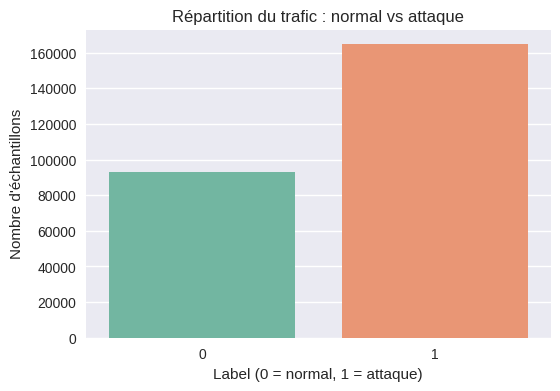

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Répartition du trafic : normal vs attaque')
plt.xlabel('Label (0 = normal, 1 = attaque)')
plt.ylabel('Nombre d\'échantillons')
plt.show()


/tmp/ipython-input-838243988.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette='crest')


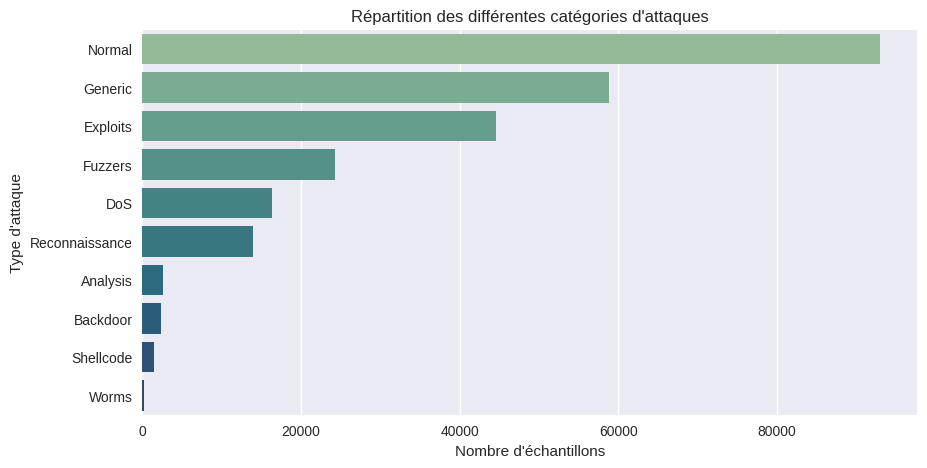

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='attack_cat', data=df, order=df['attack_cat'].value_counts().index, palette='crest')
plt.title('Répartition des différentes catégories d\'attaques')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Type d\'attaque')
plt.show()


In [ ]:
# Nombre total de colonnes
print(f"Nombre total de colonnes : {df.shape[1]}")

# Séparation des colonnes numériques et catégorielles
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print(f"\nNombre de features numériques : {len(num_features)}")
print(f"Nombre de features catégorielles : {len(cat_features)}")

print("\nExemples de features numériques :", list(num_features[:10]))
print("Exemples de features catégorielles :", list(cat_features[:10]))


Nombre total de colonnes : 45

Nombre de features numériques : 41
Nombre de features catégorielles : 4

Exemples de features numériques : ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload']
Exemples de features catégorielles : ['proto', 'service', 'state', 'attack_cat']


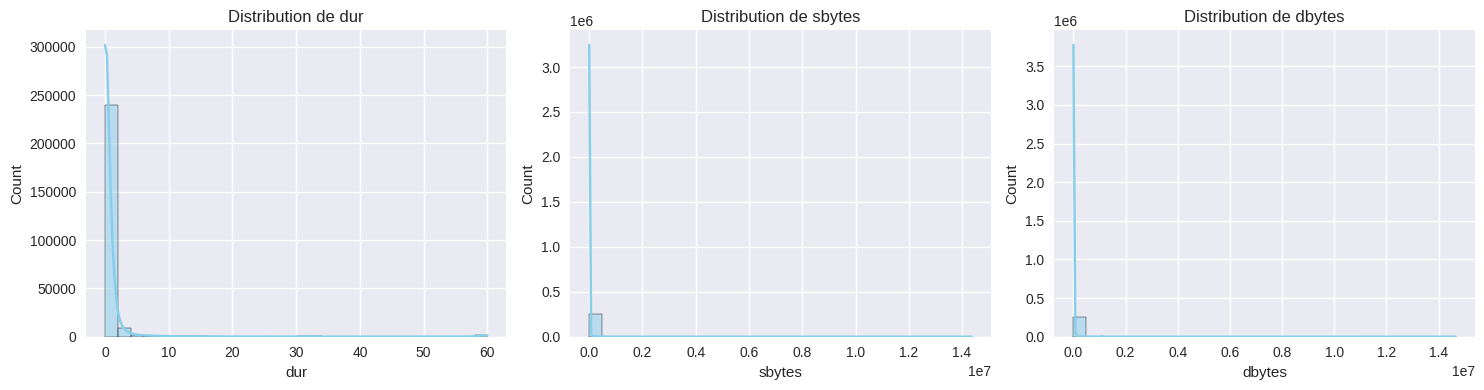

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_to_plot = ['dur', 'sbytes', 'dbytes']  # choisis les colonnes que tu veux visualiser

plt.figure(figsize=(15,4))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


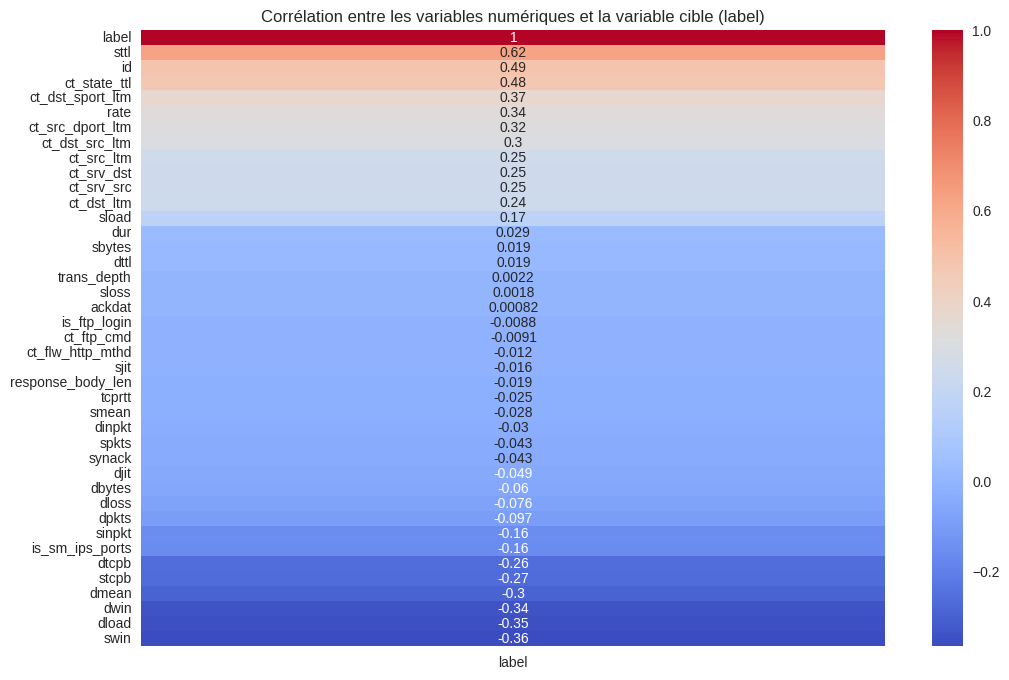

In [ ]:
plt.figure(figsize=(12,8))
corr = df[num_features].corr()
sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), annot=True, cmap='coolwarm')
plt.title('Corrélation entre les variables numériques et la variable cible (label)')
plt.show()
